In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [1]:
import numpy as np
import os


data = np.load("../input/practice/224_data.npy")
labels = np.load("../input/practice/224_labels.npy")

print(data.shape)
print(labels.shape)

(27558, 224, 224, 3)
(27558, 2)


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(22046, 224, 224, 3)
(5512, 224, 224, 3)


In [3]:
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint


INCV3 = InceptionV3(weights='imagenet',include_top=False,input_shape=(224,224,3))
INCV3 = Model(input=INCV3.input,output=INCV3.get_layer('mixed7').output)
INCV3.summary()

Using TensorFlow backend.


87916544/87910968 [==============================] - 3s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
____________________________________________

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("mi...)`
  


In [4]:
x = INCV3.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.5)(x)
prediction = Dense(2, activation='softmax', name='prediction')(x)

from keras.optimizers import RMSprop

model = Model(inputs=INCV3.input,outputs=prediction)


rms = RMSprop(lr=0.000001)
model.compile(optimizer=rms,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, y_train,
      batch_size=64,
      epochs=10,
      shuffle=True,
      validation_split=0.1,
      verbose=1)

Train on 19841 samples, validate on 2205 samples
Epoch 1/10
19841/19841 [==============================] - 111s 6ms/step - loss: 0.6820 - acc: 0.5664 - val_loss: 0.6524 - val_acc: 0.8268
Epoch 2/10
19841/19841 [==============================] - 100s 5ms/step - loss: 0.6258 - acc: 0.7445 - val_loss: 0.5737 - val_acc: 0.8798
Epoch 3/10
19841/19841 [==============================] - 99s 5ms/step - loss: 0.5337 - acc: 0.8611 - val_loss: 0.4464 - val_acc: 0.9111
Epoch 4/10
19841/19841 [==============================] - 99s 5ms/step - loss: 0.4128 - acc: 0.9206 - val_loss: 0.3186 - val_acc: 0.9388
Epoch 5/10
19841/19841 [==============================] - 99s 5ms/step - loss: 0.3053 - acc: 0.9422 - val_loss: 0.2297 - val_acc: 0.9546
Epoch 6/10
19841/19841 [==============================] - 99s 5ms/step - loss: 0.2293 - acc: 0.9524 - val_loss: 0.1761 - val_acc: 0.9605
Epoch 7/10
19841/19841 [==============================] - 99s 5ms/step - loss: 0.1794 - acc: 0.9574 - val_loss: 0.1427 - val_ac

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score



y_pred = model.predict(X_test)


print("Accuracy: ",accuracy_score(y_test.argmax(axis=1),y_pred.argmax(axis=1)))
print("F1_score: ",f1_score(y_test.argmax(axis=1),y_pred.argmax(axis=1)))
print("Recall: ",recall_score(y_test.argmax(axis=1),y_pred.argmax(axis=1)))
print("Confusion Matrix",confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1)))

Accuracy:  0.9626269956458636
F1_score:  0.962436177972283
Recall:  0.9720073664825046
Confusion Matrix [[2667  130]
 [  76 2639]]


In [9]:
model.fit(X_train, y_train,
      batch_size=64,
      epochs=5,
      shuffle=True,
      validation_split=0.1,
      verbose=1)

Train on 19841 samples, validate on 2205 samples
Epoch 1/5
19841/19841 [==============================] - 96s 5ms/step - loss: 0.1180 - acc: 0.9620 - val_loss: 0.1037 - val_acc: 0.9646
Epoch 2/5
19841/19841 [==============================] - 96s 5ms/step - loss: 0.1125 - acc: 0.9622 - val_loss: 0.1013 - val_acc: 0.9646
Epoch 3/5
19841/19841 [==============================] - 96s 5ms/step - loss: 0.1065 - acc: 0.9632 - val_loss: 0.0992 - val_acc: 0.9646
Epoch 4/5
19841/19841 [==============================] - 96s 5ms/step - loss: 0.1023 - acc: 0.9644 - val_loss: 0.0973 - val_acc: 0.9651
Epoch 5/5
19841/19841 [==============================] - 96s 5ms/step - loss: 0.0983 - acc: 0.9655 - val_loss: 0.0959 - val_acc: 0.9646


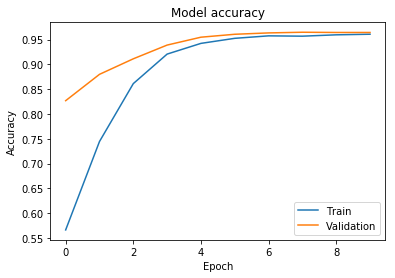

In [6]:
import matplotlib.pyplot as plt

### Plot Accuracy History

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

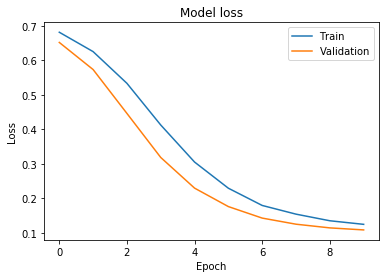

In [7]:
## Plot Loss History

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

[0 0 1 1 1 1 0 0 0 0]
